In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from collections import Counter

In [2]:
events = pd.read_csv("all_events.csv")
data = pd.read_csv("train_events.csv")
video = pd.read_csv('video_info_v2.csv')
targets = pd.read_csv('train_targets.csv')

# **ТАБЛИЦЫ, ПОДГОТОВКА К АНАЛИЗУ**

In [3]:
video[:6]

,rutube_video_id,title,category,duration,author_id
0,video_185549,Как собрать букет из мыльных тюльпанов - Силик...,Хобби,1559160,1015054
1,video_111035,"Осторожно, Киберземляне!, 1 сезон, 12 серия",Сериалы,1320007,1002180
2,video_476517,ПОПУЛЯРНЫЕ ВИДЕОИГРЫ в LEGO... перевод - TD BR...,Хобби,606145,1095337
3,video_157198,"Хороший лжец (фильм, 2019)",Фильмы,6577440,1043618
4,video_289824,Нашего старого гнобят по-всякому,Развлечения,859493,1009535
5,video_349723,Магическая битва 1 сезон 24 серия (аниме-сериа...,Разное,1422123,1048955


In [4]:
events[:5]

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 13:08:30+03:00,Tatarstan Republic,smartphone,browser,Android,Chrome Mobile,60,video_395879,10813370
1,2024-06-01 14:30:00+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,60,video_216518,10512324
2,2024-06-01 18:48:12+03:00,Novosibirsk Oblast,smartphone,mobile app,Android,Rutube,121,video_41225,10951137
3,2024-06-01 16:32:36+03:00,Moscow,desktop,browser,Windows,Yandex Browser,2324,video_215886,10912434
4,2024-06-01 00:57:04+03:00,Moscow Oblast,smartphone,mobile app,Android,Rutube,6830,video_43631,10223585


In [5]:
targets[:5]

,viewer_uid,age,sex,age_class
0,10087154,30,male,1
1,10908708,25,female,1
2,10190464,34,male,2
3,10939673,25,male,1
4,10288257,48,male,3


In [6]:
data[:7]

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976
5,2024-06-01 04:11:51+03:00,Rostov,smartphone,mobile app,Android,Rutube,60,video_61152,10013813
6,2024-06-01 22:14:37+03:00,Moscow Oblast,desktop,browser,Windows,Microsoft Edge,3882,video_53642,10058831


In [7]:
trEv_data = data
alEv_data = events
vi_data = video
trg_data = targets

In [8]:
target_data = pd.merge(data, targets, on="viewer_uid")

In [9]:
target_data

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,age,sex,age_class
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,20,female,0
1,2024-06-01 06:10:14+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,851,video_61152,10067243,20,female,0
2,2024-06-02 06:15:07+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,5516,video_96775,10067243,20,female,0
3,2024-06-03 17:35:40+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,3615,video_402535,10067243,20,female,0
4,2024-06-05 19:20:33+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,6144,video_180483,10067243,20,female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,2024-06-30 17:11:20+03:00,Moscow,smartphone,browser,Android,Chrome Mobile,5632,video_416584,10016220,25,male,1
1759612,2024-06-30 16:53:21+03:00,Tomsk Oblast,desktop,browser,Mac,Safari,3831,video_152946,10083590,21,female,1
1759613,2024-06-30 14:10:17+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,31,video_179430,10146695,50,male,3
1759614,2024-06-30 06:45:56+03:00,St.-Petersburg,smartphone,browser,Android,Firefox Mobile,312,video_316157,10828966,31,female,2


In [10]:
target_data_processed = target_data.drop(['rutube_video_id','viewer_uid'],axis=1)

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
target_data_processed

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,age,sex,age_class
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,20,female,0
1,2024-06-01 06:10:14+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,851,20,female,0
2,2024-06-02 06:15:07+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,5516,20,female,0
3,2024-06-03 17:35:40+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,3615,20,female,0
4,2024-06-05 19:20:33+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,6144,20,female,0
...,...,...,...,...,...,...,...,...,...,...
1759611,2024-06-30 17:11:20+03:00,Moscow,smartphone,browser,Android,Chrome Mobile,5632,25,male,1
1759612,2024-06-30 16:53:21+03:00,Tomsk Oblast,desktop,browser,Mac,Safari,3831,21,female,1
1759613,2024-06-30 14:10:17+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,31,50,male,3
1759614,2024-06-30 06:45:56+03:00,St.-Petersburg,smartphone,browser,Android,Firefox Mobile,312,31,female,2


In [13]:
target_data_processed['sex'].value_counts()

,count
sex,
female,1084515
male,675101


In [14]:
tdp_m = target_data_processed[target_data_processed['sex']=='male'].sample(675101)
tdp_f = target_data_processed[target_data_processed['sex']=='female'].sample(675101)
target_data_processed = pd.concat([tdp_m, tdp_f], ignore_index=True)
#Уравниваем количество женщин и мужчин

# **КОРРЕЛЯЦИЯ С ВОЗРАСТОМ**

In [15]:
target_data_processed

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,age,sex,age_class
0,2024-06-22 16:31:44+03:00,Moscow,smartphone,mobile app,Android,Rutube,1160,31,male,2
1,2024-06-06 00:12:10+03:00,Amur Oblast,smartphone,mobile app,Android,Rutube,5101,37,male,2
2,2024-06-24 12:18:35+03:00,Moscow,smartphone,mobile app,Android,Rutube,6151,46,male,3
3,2024-06-18 23:22:47+03:00,Yaroslavl Oblast,smartphone,mobile app,NaN,Rutube,1260,54,male,3
4,2024-06-04 03:09:00+03:00,Saratov Oblast,smartphone,browser,Android,Chrome Mobile,72,24,male,1
...,...,...,...,...,...,...,...,...,...,...
1350197,2024-06-28 11:20:59+03:00,Novosibirsk Oblast,desktop,browser,Windows,Yandex Browser,212,24,female,1
1350198,2024-06-05 16:07:34+03:00,Tomsk Oblast,smartphone,browser,Android,Chrome Mobile,2264,39,female,2
1350199,2024-06-13 08:52:54+03:00,Moscow,smartphone,mobile app,Android,Rutube,888,32,female,2
1350200,2024-06-22 18:04:24+03:00,Sverdlovsk Oblast,smartphone,mobile app,Android,Rutube,2494,24,female,1


In [16]:
#кол-во пользователей определенных возр. групп
target_data_processed['age_class'].value_counts().sort_index()

,count
age_class,
0,47911
1,473025
2,522219
3,307047


In [17]:
target_data_processed.groupby('age_class')['age'].apply(set)

,age
age_class,
0,"{11, 12, 13, 14, 15, 16, 17, 18, 19, 20}"
1,"{21, 22, 23, 24, 25, 26, 27, 28, 29, 30}"
2,"{32, 33, 34, 35, 36, 37, 38, 39, 40, 31}"
3,"{41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5..."


Text(0, 0.5, 'кол-во пользователей')

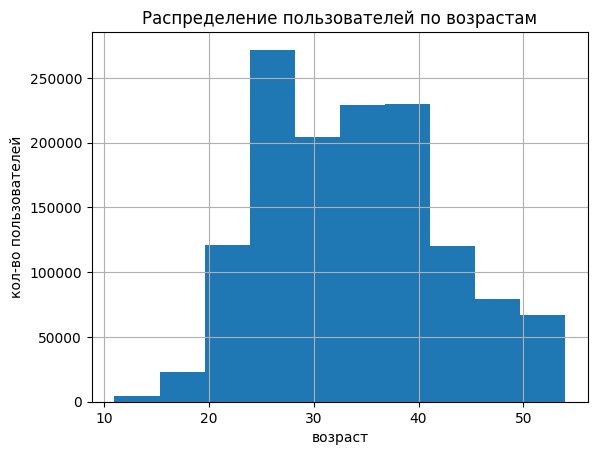

In [18]:
target_data_processed.age.hist()
plt.title('Распределение пользователей по возрастам')
plt.xlabel("возраст")
plt.ylabel("кол-во пользователей")

- самая малочисленная группа это 9-20 лет (3.5% от всех пользователей) неочевидный вывод
- самая многочисленная группа это 30-40 лет (38%)
- группа 40-60 лет составляет 22.7% Неочевидный вывод
- Основная категория - люди от 20 до 40 лет

In [19]:
#корреляция между временем просмотра и возрастом
covariance = target_data_processed['total_watchtime'].cov(target_data_processed['age'])
covariance

-440.15101468748577

Чем больше возраст - тем меньше часов смотрят рутуб

In [20]:
target_data_processed

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,age,sex,age_class
0,2024-06-22 16:31:44+03:00,Moscow,smartphone,mobile app,Android,Rutube,1160,31,male,2
1,2024-06-06 00:12:10+03:00,Amur Oblast,smartphone,mobile app,Android,Rutube,5101,37,male,2
2,2024-06-24 12:18:35+03:00,Moscow,smartphone,mobile app,Android,Rutube,6151,46,male,3
3,2024-06-18 23:22:47+03:00,Yaroslavl Oblast,smartphone,mobile app,NaN,Rutube,1260,54,male,3
4,2024-06-04 03:09:00+03:00,Saratov Oblast,smartphone,browser,Android,Chrome Mobile,72,24,male,1
...,...,...,...,...,...,...,...,...,...,...
1350197,2024-06-28 11:20:59+03:00,Novosibirsk Oblast,desktop,browser,Windows,Yandex Browser,212,24,female,1
1350198,2024-06-05 16:07:34+03:00,Tomsk Oblast,smartphone,browser,Android,Chrome Mobile,2264,39,female,2
1350199,2024-06-13 08:52:54+03:00,Moscow,smartphone,mobile app,Android,Rutube,888,32,female,2
1350200,2024-06-22 18:04:24+03:00,Sverdlovsk Oblast,smartphone,mobile app,Android,Rutube,2494,24,female,1


Text(0, 0.5, 'просмотр. часов')

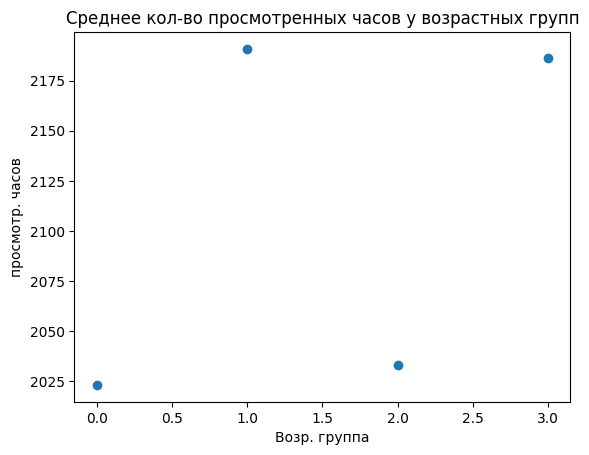

In [21]:
#сложим два предыдущих вывода, и узнаем: какая возр.категория смотрит ютуб больше
#covariance = target_data_processed['total_watchtime'].cov(target_data_processed['age_class'])
#covariance
y=[]
for i in range(4):
  y.append(target_data_processed[target_data_processed['age_class']==i]['total_watchtime'].mean())

plt.scatter(target_data_processed['age_class'].unique(), y)
plt.title("Среднее кол-во просмотренных часов у возрастных групп")
plt.xlabel("Возр. группа")
plt.ylabel("просмотр. часов")

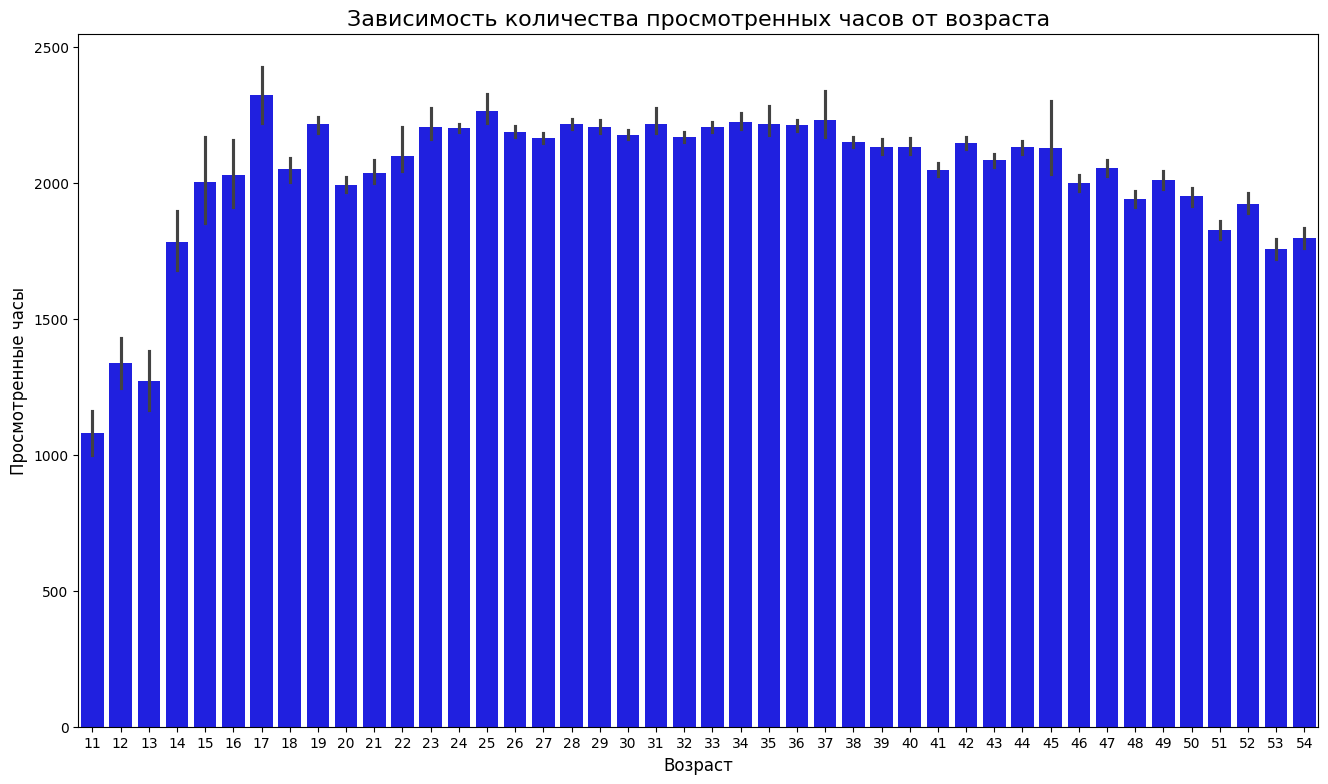

In [22]:
tmp_df = pd.concat([target_data_processed['total_watchtime'],target_data_processed['age']], axis=1, ignore_index=True)
tmp_df.columns = ['total_watchtime', 'age']

plt.figure(figsize=(16,9))

sns.barplot(x='age', y='total_watchtime', data=tmp_df, color='blue')
plt.title('Зависимость количества просмотренных часов от возраста', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Просмотренные часы', fontsize=12)
sns.set_style('whitegrid')
plt.show()

**Микровывод: чем больше часов просмотра <=> тем меньше возраст**

среднее время просмотра всех возр. групп схожее, однако группы от 9 до 30 лет - смотрят в среднем на 9% больше времени

In [23]:
target_data_processed

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,age,sex,age_class
0,2024-06-22 16:31:44+03:00,Moscow,smartphone,mobile app,Android,Rutube,1160,31,male,2
1,2024-06-06 00:12:10+03:00,Amur Oblast,smartphone,mobile app,Android,Rutube,5101,37,male,2
2,2024-06-24 12:18:35+03:00,Moscow,smartphone,mobile app,Android,Rutube,6151,46,male,3
3,2024-06-18 23:22:47+03:00,Yaroslavl Oblast,smartphone,mobile app,NaN,Rutube,1260,54,male,3
4,2024-06-04 03:09:00+03:00,Saratov Oblast,smartphone,browser,Android,Chrome Mobile,72,24,male,1
...,...,...,...,...,...,...,...,...,...,...
1350197,2024-06-28 11:20:59+03:00,Novosibirsk Oblast,desktop,browser,Windows,Yandex Browser,212,24,female,1
1350198,2024-06-05 16:07:34+03:00,Tomsk Oblast,smartphone,browser,Android,Chrome Mobile,2264,39,female,2
1350199,2024-06-13 08:52:54+03:00,Moscow,smartphone,mobile app,Android,Rutube,888,32,female,2
1350200,2024-06-22 18:04:24+03:00,Sverdlovsk Oblast,smartphone,mobile app,Android,Rutube,2494,24,female,1


In [24]:
#Корреляция регионов с классом возраста
covariance = pd.crosstab(target_data_processed['region'], target_data_processed['age_class'])
covariance

age_class,0,1,2,3
region,,,,
Adygeya Republic,134,1289,1393,823
Altai,56,368,220,187
Altay Kray,360,3657,3374,2165
Amur Oblast,311,4214,4609,2833
Arkhangelsk Oblast,0,0,70,0
...,...,...,...,...
Voronezh Oblast,696,6804,5862,2685
Voronezj,29,473,539,412
Yamalo-Nenets,72,955,1214,768


Внеочередное подтверждение, что людей от 9 до 20 лет - наим. кол. среди всех пользователей.

In [25]:
#корреляция между временем просмотра и возрастом
covariance = target_data_processed['total_watchtime'].cov(target_data_processed['age'])
covariance

-440.15101468748577

In [26]:
#тип девайса и возраст
covariance = pd.crosstab(target_data_processed['ua_device_type'], target_data_processed['age_class'])
covariance

age_class,0,1,2,3
ua_device_type,,,,
desktop,15039,133441,130267,92348
smartphone,30327,310125,365319,194440
tablet,2545,29459,26633,20259


- за компами сидит больше людей от 20 лет

- через смартфоны - ~поровну все

In [27]:
#браузер/приложение и возраст
covariance = pd.crosstab(target_data_processed['ua_client_type'], target_data_processed['age_class'])
covariance

age_class,0,1,2,3
ua_client_type,,,,
av,0,2,4,5
browser,19579,185147,177026,113177
mobile app,28332,287876,345189,193865


Через приложение в среднем сидит на 40-50% больше пользователей, чем через браузер

In [28]:
#браузер/приложение и возраст
covariance = pd.crosstab(target_data_processed['ua_client_type'], target_data_processed['age_class'])
covariance

age_class,0,1,2,3
ua_client_type,,,,
av,0,2,4,5
browser,19579,185147,177026,113177
mobile app,28332,287876,345189,193865


In [29]:
#ОС и возраст
covariance = pd.crosstab(target_data_processed['ua_os'], target_data_processed['age_class']).nlargest(10, 2)
covariance

age_class,0,1,2,3
ua_os,,,,
Android,29024,293643,343713,187485
Windows,13708,109314,113683,85173
Mac,1239,21434,13781,4704
iOS,1310,19658,10796,2856
GNU/Linux,84,2636,2631,2219
iPadOS,23,364,308,169
Ubuntu,8,62,170,258
Windows Phone,4,50,74,92
android tv,0,39,72,16


!! Вынесем категорию 0, т.к. её представителей - меньшиство, и соотв. здесь её рассмотрение искажало бы представление о положении дел

- Среди пользователей Mac и IOS - пользователей 20-30 лет больше (на ~50%), чем пользователей 30-40 лет.

- основная масса людей 40-60 лет использует Android (top-1) и Windows (top-2)

In [30]:
#название браузера и возраст
covariance = pd.crosstab(target_data_processed['ua_client_name'], target_data_processed['age_class']).nlargest(10, 2)
covariance

age_class,0,1,2,3
ua_client_name,,,,
Rutube,28208,287322,344844,193782
Yandex Browser,9011,64737,60921,48558
Chrome,3507,47176,50229,28957
Chrome Mobile,1972,21111,21769,6137
Mobile Safari,966,14577,7492,1842
Opera,727,4935,7176,5104
Firefox Mobile,528,4867,6612,7580
Safari,925,11586,6261,1831
Microsoft Edge,1227,8090,6227,4743


# **КОРРЕЛЯЦИЯ С ПОЛОМ**

In [31]:
#корреялция между возрастной группой и полом
tmp = pd.crosstab(target_data_processed['age_class'], target_data_processed['sex'])
tmp
# 0 - 9..20
# 1 - 20..30
# 2 - 30..40
# 3 - 40..60

sex,female,male
age_class,,
0,30161,17750
1,298854,174171
2,249619,272600
3,96467,210580


Среди людей 20-30 лет, юзеров рутуба на ~30% больше женщин, чем мужчин

In [32]:
#тип устройства и пол
tmp = pd.crosstab(target_data_processed['ua_device_type'], target_data_processed['sex'])
tmp

sex,female,male
ua_device_type,,
desktop,151572,219523
smartphone,482032,418179
tablet,41497,37399


С компьютеров чаще (на ~%28) сидят мужчины, чем женщины

In [33]:
tmp = pd.crosstab(target_data_processed['region'], target_data_processed['sex'])
tmp[:20]

sex,female,male
region,,
Adygeya Republic,1933,1706
Altai,431,400
Altay Kray,5440,4116
Amur Oblast,6342,5625
Arkhangelsk Oblast,70,0
Arkhangelskaya,3760,3423
Astrakhan,36,30
Astrakhan Oblast,1726,1625
Bashkortostan Republic,19909,16161


Зависимости между полом и регионом НЕТ!

In [34]:
#зависимость между ОС и полом
tmp = pd.crosstab(target_data_processed['ua_os'], target_data_processed['sex']).nlargest(10, 'female')
tmp

sex,female,male
ua_os,,
Android,457445,396420
Windows,126565,195313
Mac,22991,18167
iOS,18271,16349
GNU/Linux,1887,5683
iPadOS,539,325
Ubuntu,135,363
android tv,95,32
Windows Phone,88,132


Здесь присутствует слабая корреялция:
- С андроида (а соответсвенно, и телефона) сидит больше девушек, чем парней (на 11%)
- с виндовс (а следствие - почти всегда - с компьютера) сидит больше парней, чем девушек (на 30%)
-С линукса сидит на 64% больше парней, чем девушек

-Дальнейшие корреялции можно вывести самостоятельно, но они не кажутся значимыми.

In [35]:
#зависимость между браузером/приложением просмотра и полом
tmp = pd.crosstab(target_data_processed['ua_client_name'], target_data_processed['sex']).nlargest(10, 'female')
tmp


sex,female,male
ua_client_name,,
Rutube,469610,384546
Yandex Browser,77782,105445
Chrome,52733,77136
Chrome Mobile,18168,32821
Mobile Safari,13178,11699
Safari,13022,7581
Microsoft Edge,8470,11817
Firefox Mobile,7388,12199
Opera,5465,12477


- на 15% больше женщин, чем мужчин сидит с Rutube
- на 24% больше мужчин сидит с Yandex Browser
- на 16% больше мужчин в Google Chrome
- Дальнейшие корреляции статистически малозначимы



# **КОРРЕЛЯЦИЯ СО ВРЕМЕНЕМ**

Для начала, импортируем датаСет с приведенным к локальному временем. Далее, будем рассматривать корреляции между временем и полом/возрастом

In [36]:
data_fixed_time = pd.read_csv("data_fixed_time.csv")
data_fixed_time = data_fixed_time.drop(data_fixed_time.columns[0], axis=1)
data_fixed_time = pd.merge(data_fixed_time, targets, on="viewer_uid")

In [37]:
data_fixed_time = data_fixed_time[['timestamp', 'weekday', 'hour', 'region', 'ua_device_type', 'ua_client_type', 'ua_os', 'ua_client_name', 'total_watchtime', 'age', 'sex', 'age_class']]

In [38]:
data_fixed_time

,timestamp,weekday,hour,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,age,sex,age_class
0,2024-06-01 08:40:58,6,8,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883.0,20,female,0
1,2024-06-01 08:10:14,6,8,Chelyabinsk,desktop,browser,Windows,Yandex Browser,851.0,20,female,0
2,2024-06-02 08:15:07,7,8,Chelyabinsk,desktop,browser,Windows,Yandex Browser,5516.0,20,female,0
3,2024-06-03 19:35:40,1,19,Chelyabinsk,desktop,browser,Windows,Yandex Browser,3615.0,20,female,0
4,2024-06-05 21:20:33,3,21,Chelyabinsk,desktop,browser,Windows,Yandex Browser,6144.0,20,female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
814259,2024-06-14 07:13:22,5,7,Moscow,desktop,browser,Windows,Yandex Browser,113.0,36,male,2
814260,2024-06-14 02:08:40,5,2,Moscow,smartphone,browser,iOS,Microsoft Edge,83.0,36,male,2
814261,2024-06-14 01:51:12,5,1,Moscow,smartphone,browser,Android,Yandex Browser,63.0,30,male,1
814262,2024-06-14 06:09:35,5,6,Moscow,smartphone,mobile app,Android,Rutube,4531.0,44,male,3


In [39]:
data_fixed_time['sex'].value_counts()

,count
sex,
female,502021
male,312243


In [40]:
tdp_m = data_fixed_time[data_fixed_time['sex']=='male'].sample(312243)
tdp_f = data_fixed_time[data_fixed_time['sex']=='female'].sample(312243)
data_fixed_time = pd.concat([tdp_m, tdp_f], ignore_index=True)
#Уровняли количество женщин и мужчин для чистоты выводов

## **ВРЕМЯ К ПОЛУ**

In [41]:
#день недели к полу
tmp = pd.crosstab(data_fixed_time['weekday'], data_fixed_time['sex'])
tmp

sex,female,male
weekday,,
1,53871,48293
2,47137,45495
3,43288,45954
4,41922,47047
5,35040,38263
6,37081,40005
7,53904,47186


как мы видим, есть слабая корреляция между днём просмотра и полом:

- в воскресенье, на 10% больше женщин, чем мужчин

- В понедельник, ситуация аналогичная

In [42]:
#час к полу
tmp = pd.crosstab(data_fixed_time['hour'], data_fixed_time['sex'])
tmp

sex,female,male
hour,,
0,14137,15527
1,9038,11068
2,5787,7754
3,3862,5881
4,3007,4919
5,3547,5285
6,5380,6624
7,7628,8211
8,10324,9666


Следующий интересный вывод:
- с 19 до 7 - преобладают мужчины.
- с 7 до 19 - преобладают женщины.

**может быть связано с тем, что большинство мужчин на работе с 7 до 19**

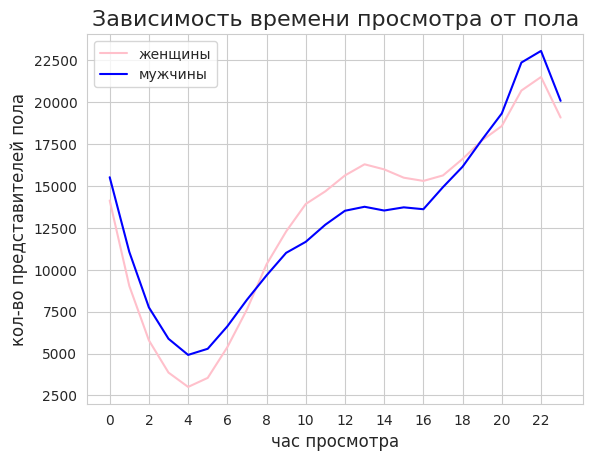

In [43]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(x, tmp['female'],color='pink', label='женщины')
plt.plot(x, tmp['male'],color='blue', label='мужчины')
plt.title('Зависимость времени просмотра от пола', fontsize=16)
plt.xlabel('час просмотра', fontsize=12)
plt.legend()
plt.xticks(range(0,24,2))
plt.ylabel('кол-во представителей пола', fontsize=12)
sns.set_style('whitegrid')
plt.show()

Зависимость видна на графике. Из неё следует важный вывод:

- С 1 до 7 мужчины более активно пользуются сервисом, чем женщины

- с 7 до 18 женщины более активно пользуются сервисом

## **Время к возрасту**

In [44]:
#день недели к полу
tmp = pd.crosstab(data_fixed_time['weekday'], data_fixed_time['age_class'])
tmp

age_class,0,1,2,3
weekday,,,,
1,3494,35613,40626,22431
2,3163,32431,35974,21064
3,3047,31005,34531,20659
4,3153,30827,34726,20263
5,2506,25442,28461,16894
6,2735,26128,29586,18637
7,4011,35920,38472,22687


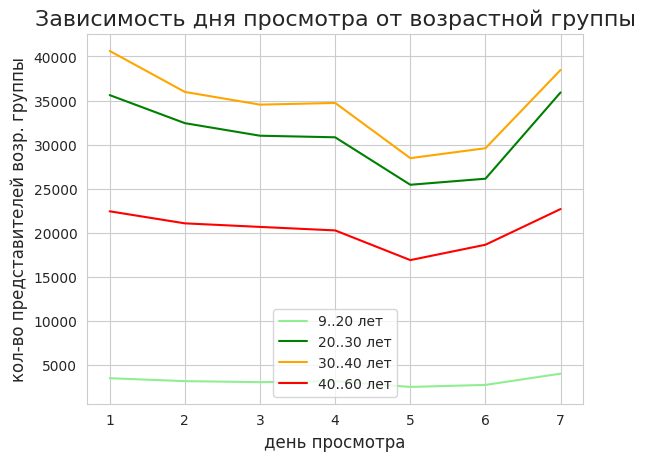

In [45]:
x = [1,2,3,4,5,6,7]
plt.plot(x, tmp[tmp.columns[0]],color='lightgreen', label='9..20 лет')
plt.plot(x, tmp[tmp.columns[1]],color='green', label='20..30 лет')
plt.plot(x, tmp[tmp.columns[2]],color='orange', label='30..40 лет')
plt.plot(x, tmp[tmp.columns[3]],color='red', label='40..60 лет')

plt.title('Зависимость дня просмотра от возрастной группы', fontsize=16)
plt.xlabel('день просмотра', fontsize=12)
plt.legend()
plt.xticks(range(1,8,1))
plt.ylabel('кол-во представителей возр. группы', fontsize=12)
sns.set_style('whitegrid')
plt.show()

**Тенденция повторяется вне зависимости от возрастной группы**

In [46]:
#час к возрасту
tmp = pd.crosstab(data_fixed_time['hour'], data_fixed_time['age_class'])
tmp

age_class,0,1,2,3
hour,,,,
0,1051,10556,11532,6525
1,700,7171,8011,4224
2,487,4684,5399,2971
3,309,3272,3897,2265
4,193,2597,3128,2008
5,222,2744,3368,2498
6,257,3644,4854,3249
7,466,4642,6475,4256
8,537,6160,8206,5087


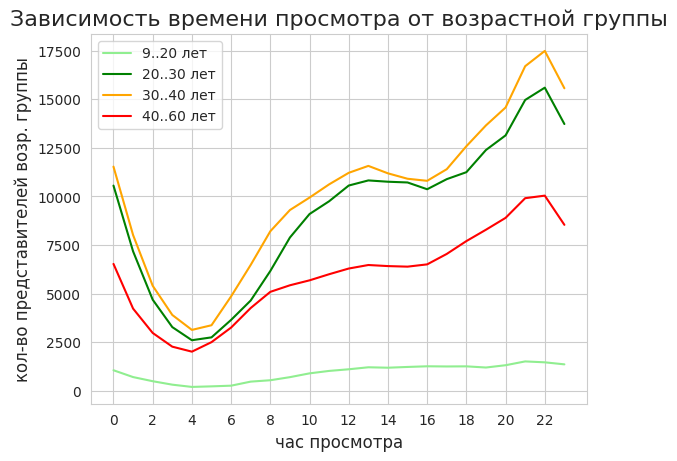

In [47]:
#время к возрасту
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.plot(x, tmp[tmp.columns[0]],color='lightgreen', label='9..20 лет')
plt.plot(x, tmp[tmp.columns[1]],color='green', label='20..30 лет')
plt.plot(x, tmp[tmp.columns[2]],color='orange', label='30..40 лет')
plt.plot(x, tmp[tmp.columns[3]],color='red', label='40..60 лет')

plt.title('Зависимость времени просмотра от возрастной группы', fontsize=16)
plt.xlabel('час просмотра', fontsize=12)
plt.legend()
plt.xticks(range(0,24,2))
plt.ylabel('кол-во представителей возр. группы', fontsize=12)
sns.set_style('whitegrid')
plt.show()

Как мы видим, **тенденция повсторяется для каждой возрастной группы с разной чувствительностью**, а соответственно - несёт мало значимой для нас информации

## Частота просмотров к дню недели

In [48]:
data_fixed_time

,timestamp,weekday,hour,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,age,sex,age_class
0,2024-06-02 16:05:58,7,16,Moscow,smartphone,mobile app,Android,Rutube,3142.0,43,male,3
1,2024-06-06 01:01:14,4,1,Leningradskaya Oblast',smartphone,mobile app,Android,Rutube,2562.0,34,male,2
2,2024-06-07 20:40:04,5,20,Moscow,smartphone,mobile app,Android,Rutube,3900.0,36,male,2
3,2024-06-01 03:19:43,6,3,Kaliningrad Oblast,desktop,browser,Windows,Chrome,1582.0,30,male,1
4,2024-06-02 18:31:39,7,18,Tula Oblast,smartphone,mobile app,NaN,Rutube,6461.0,30,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...
624481,2024-06-09 06:48:38,7,6,Nizhny Novgorod Oblast,smartphone,mobile app,Android,Rutube,2441.0,34,female,2
624482,2024-06-07 21:25:41,5,21,Kursk,smartphone,mobile app,Android,Rutube,1628.0,28,female,1
624483,2024-06-10 12:14:33,1,12,Stavropol Kray,smartphone,mobile app,Android,Rutube,3449.0,37,female,2
624484,2024-06-01 19:58:51,6,19,Khakasiya Republic,smartphone,mobile app,Android,Rutube,2460.0,25,female,1


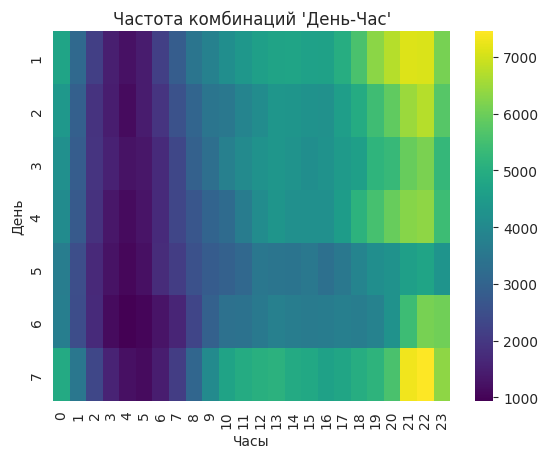

In [51]:
# Группировка данных по дням и часам
grouped_data = data_fixed_time.groupby(['weekday', 'hour']).size().reset_index(name='count')

# Создание таблицы для тепловой карты
heatmap_data = grouped_data.pivot(index='weekday', columns='hour', values='count')

# Построение тепловой карты
sns.heatmap(heatmap_data, annot=False, cmap="viridis", fmt="d")
plt.xlabel("Часы")
plt.ylabel("День")
plt.title("Частота комбинаций 'День-Час'")
plt.show()

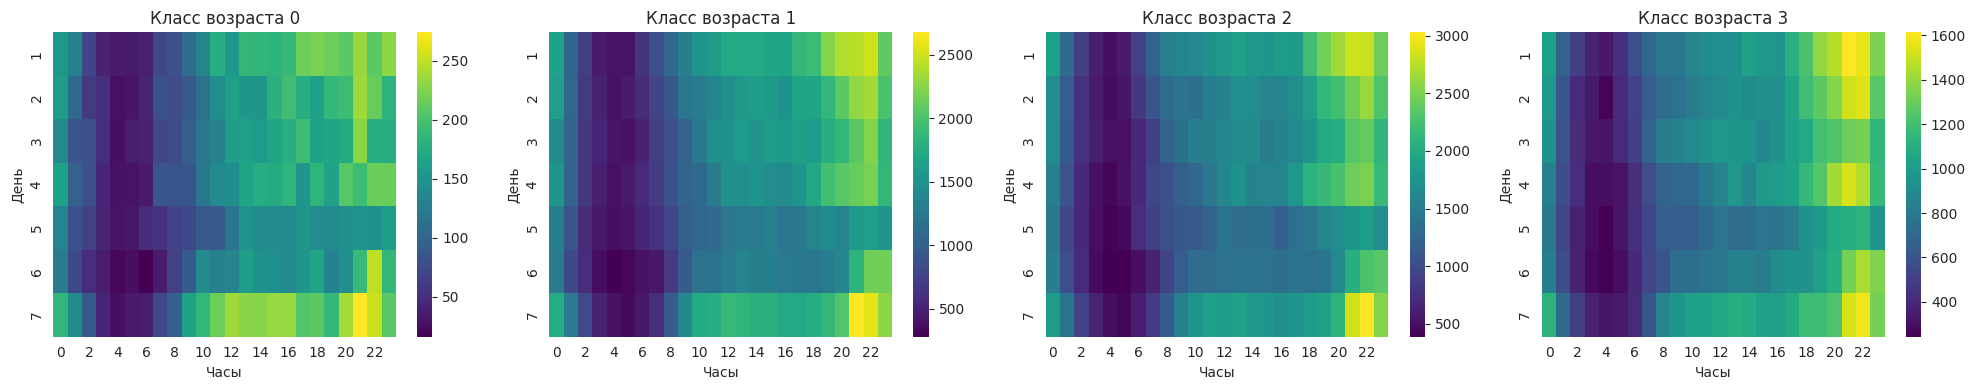

In [54]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Список групп (замените на свои группы)
groups = [0, 1, 2, 3]

# Цикл по группам
for i, group in enumerate(groups):
    # Фильтруем данные по группе
    group_data = data_fixed_time[data_fixed_time['age_class'] == group]

    # Группировка данных по дням и часам
    grouped_data = group_data.groupby(['weekday', 'hour']).size().reset_index(name='count')

    # Создание таблицы для тепловой карты
    heatmap_data = grouped_data.pivot(index='weekday', columns='hour', values='count')

    # Построение тепловой карты
    sns.heatmap(heatmap_data, annot=False, cmap="viridis", fmt="d", ax=axes[i])
    axes[i].set_xlabel("Часы")
    axes[i].set_ylabel("День")
    axes[i].set_title(f"Класс возраста {group}")

# Вывод графика
plt.tight_layout() # Подгоняем графики, чтобы они не перекрывались
plt.show()

- У более молодой категории пользователей, график разобщен: пики просмотров не поддаются классификации.
- У более старшей категории пик активности приходится на 20-23 часа каждого дня (кроме, разве что, пятницы - у всех пользователей она признана днем отдыха от интернета =D )

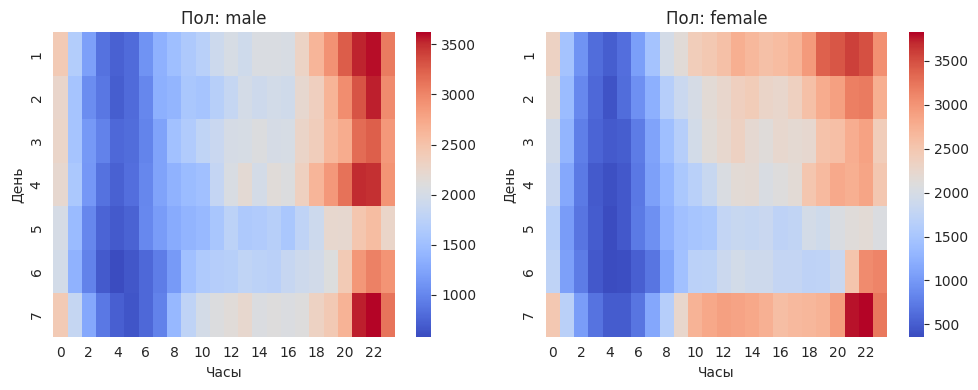

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Список групп (замените на свои группы)
groups = ['male','female']

# Цикл по группам
for i, group in enumerate(groups):
    # Фильтруем данные по группе
    group_data = data_fixed_time[data_fixed_time['sex'] == group]

    # Группировка данных по дням и часам
    grouped_data = group_data.groupby(['weekday', 'hour']).size().reset_index(name='count')

    # Создание таблицы для тепловой карты
    heatmap_data = grouped_data.pivot(index='weekday', columns='hour', values='count')

    # Построение тепловой карты
    sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", fmt="d", ax=axes[i])
    axes[i].set_xlabel("Часы")
    axes[i].set_ylabel("День")
    axes[i].set_title(f"Пол: {group}")

# Вывод графика
plt.tight_layout() # Подгоняем графики, чтобы они не перекрывались
plt.show()

- В подтверждение прошлых выводов: мужчины наиболее активно используют Rutube с 20 до 23 (традиционно кроме пятницы и субботы). Наименее активно - с 1 до 6

- График женщин более разобщён. Наименее активны они также с 1 до 6, но вот дней наибольшей активности у них почти нет: исключением является воскресенье, и, отчасти, понедельник. В одно и то же время - 20 - 22 часа.